In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

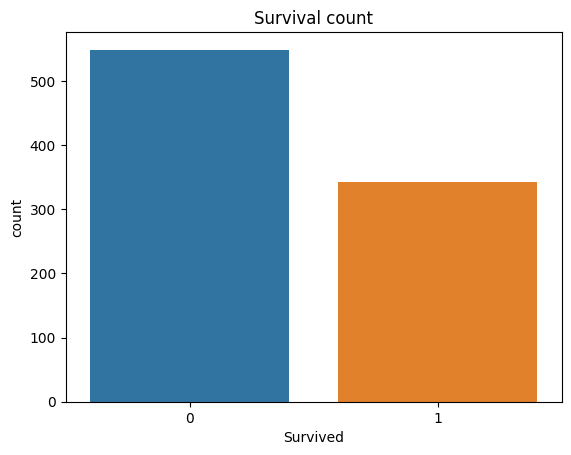

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train)
plt.title("Survival count")
plt.show()

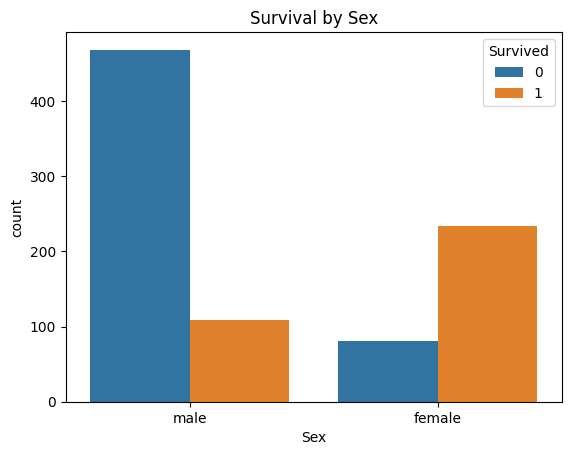

In [10]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survival by Sex")
plt.show()

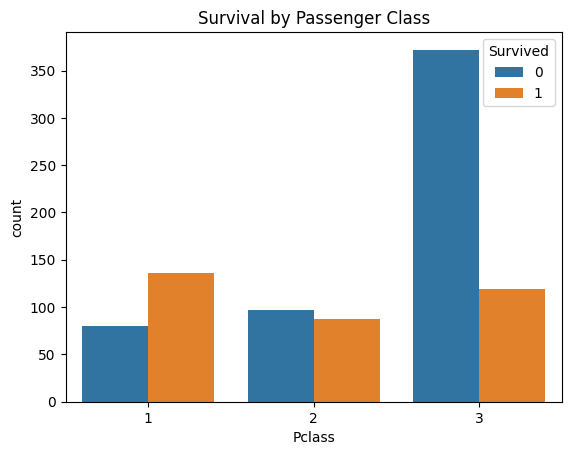

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title("Survival by Passenger Class")
plt.show()

In [12]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [13]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [14]:
train['Embarked'].isnull().sum()

2

In [15]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [16]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [18]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())


In [19]:
print(test['Fare'].dtype)
print(test['Fare'].head())
print(test['Fare'].isnull().sum())


float64
0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
Name: Fare, dtype: float64
0


In [20]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [22]:
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)


In [23]:
def get_title(name):
    import re
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

train['Title'] = train['Name'].apply(get_title)
test['Title'] = test['Name'].apply(get_title)


In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,True,False,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,False,True,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,True,False,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,False,True,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,False,True,Mrs


In [25]:
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']

train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(['Mlle', 'Ms'], 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')


In [26]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
train['Title'] = train['Title'].map(title_mapping).fillna(0)
test['Title'] = test['Title'].map(title_mapping).fillna(0)


In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True,1


In [28]:
train.drop(['Name', 'Ticket'], axis=1, inplace=True)
test.drop(['Name', 'Ticket'], axis=1, inplace=True)


In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title
0,1,0,3,0,22.0,1,0,7.2500,False,True,1
1,2,1,1,1,38.0,1,0,71.2833,False,False,3
2,3,1,3,1,26.0,0,0,7.9250,False,True,2
3,4,1,1,1,35.0,1,0,53.1000,False,True,3
4,5,0,3,0,35.0,0,0,8.0500,False,True,1


In [30]:
x_train = train.drop(['PassengerId', 'Survived'], axis=1)
y_train = train['Survived']

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [85]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_tr, y_tr)

preds = model.predict(x_val)
print("Validation Accuracy:", accuracy_score(y_val, preds))

Validation Accuracy: 0.8268156424581006


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_tr, y_tr)

# Predict and evaluate
rf_preds = rf_model.predict(x_val)
print("Random Forest Accuracy:", accuracy_score(y_val, rf_preds))


Random Forest Accuracy: 0.8268156424581006


In [89]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_tr, y_tr)

# Predict and evaluate
gb_preds = gb_model.predict(x_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, gb_preds))


Gradient Boosting Accuracy: 0.8156424581005587


In [94]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

numeric_cols = ['Age', 'Fare']
x_train_scaled = x_train.copy()

x_train_scaled[numeric_cols] = scalar.fit_transform(x_train_scaled[numeric_cols])

In [95]:
x_train_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title
0,3,0,-0.565736,1,0,-0.502445,False,True,1.0
1,1,1,0.663861,1,0,0.786845,False,False,3.0
2,3,1,-0.258337,0,0,-0.488854,False,True,2.0
3,1,1,0.433312,1,0,0.420730,False,True,3.0
4,3,0,0.433312,0,0,-0.486337,False,True,1.0
...,...,...,...,...,...,...,...,...,...
886,2,0,-0.181487,0,0,-0.386671,False,True,0.0
887,1,1,-0.796286,0,0,-0.044381,False,True,2.0
888,3,1,-0.104637,1,2,-0.176263,False,True,2.0
889,1,0,-0.258337,0,0,-0.044381,False,False,1.0


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_tr, y_tr)

rf_preds = rf_model.predict(x_val)
print("Random Forest Accuracy:", accuracy_score(y_val, rf_preds))




Random Forest Accuracy: 0.8268156424581006


In [103]:
test_scaled = test.copy()
test_scaled[numeric_cols] = scalar.transform(test_scaled[numeric_cols])
test_scaled = test_scaled.drop(columns=['PassengerId'])

test_preds = rf_model.predict(test_scaled)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_preds
})

submission.to_csv('submission.csv', index=False)


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-06-08 10:25:11.611972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749378312.006532      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749378312.119165      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

numeric_cols = ['Age', 'Fare']
x_train_scaled = x_train.copy()

x_train_scaled[numeric_cols] = scalar.fit_transform(x_train_scaled[numeric_cols])


In [34]:
x_train_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title
0,3,0,-0.565736,1,0,-0.502445,False,True,1
1,1,1,0.663861,1,0,0.786845,False,False,3
2,3,1,-0.258337,0,0,-0.488854,False,True,2
3,1,1,0.433312,1,0,0.420730,False,True,3
4,3,0,0.433312,0,0,-0.486337,False,True,1
...,...,...,...,...,...,...,...,...,...
886,2,0,-0.181487,0,0,-0.386671,False,True,5
887,1,1,-0.796286,0,0,-0.044381,False,True,2
888,3,1,-0.104637,1,2,-0.176263,False,True,2
889,1,0,-0.258337,0,0,-0.044381,False,False,1


In [36]:
model = keras.Sequential([
    layers.Input(shape=(x_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [39]:
model.fit(x_train_scaled, y_train,
         epochs=500,
         batch_size=32,
         validation_split=0.2,
         verbose=1
         )

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8379 - loss: 0.3766 - val_accuracy: 0.8659 - val_loss: 0.3380
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8384 - loss: 0.3731 - val_accuracy: 0.8771 - val_loss: 0.3368
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8484 - loss: 0.3704 - val_accuracy: 0.8659 - val_loss: 0.3386
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8212 - loss: 0.4147 - val_accuracy: 0.8715 - val_loss: 0.3360
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8336 - loss: 0.3775 - val_accuracy: 0.8659 - val_loss: 0.3323
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8381 - loss: 0.3730 - val_accuracy: 0.8715 - val_loss: 0.3316
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8526 - loss: 0.3743 - val_accuracy: 0.8715 - val_loss: 0.3351
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8562 - loss: 0.3710 - val_accuracy: 0.8603 - 